# Proyecto investigación operativa

## Importaciones

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from pyomo.environ import *

## Planteamiento del problema inicial

Tenemos un estadio de fútbol y queremos ubicar los asientos conforme obtengamos la mayor cantidad de beneficio posible. Los precios de las entradas van acorde a como de bien se ve desde cada asiento. Por tanto, las de tribuna y preferencia son las más caras, valiendo tribuna 20 euros, y preferencia 15. Mientras que las de pabellón y y maratón son de 10 y 5 eureos respectivamente.

El número de entradas de las que disponemos son 100 para todo el estadio. Pero hay que tener en cuenta que las de maratón son 2 veces más vendidas que las de tribuna, salvo un margen de 10 entradas que se puede exceder tribuna.

#### Variables de Decisión
    $x_1$: Número de entradas vendidas de Tribuna.
    $x_2$: Número de entradas vendidas de Preferencia.
    $x_3$: Número de entradas vendidas de Pabellón.
    $x_4$: Número de entradas vendidas de Maratón.

#### Función Objetivo
Maximizar el beneficio total:
$$
Z = 20x_1 + 15x_2 + 10x_3 + 5x_4
$$

#### Restricciones
1. Restricción del número total de entradas:
$$
x_1 + x_2 + x_3 + x_4 \leq 100
$$

2. Restricción de las entradas de Maratón:
$$
x_1 - 2x_4\leq  10
$$

3. Restricción de no negatividad:
$$
x_1 , x_2 , x_3 , x_4 \geq 0
$$


## Resolución del problema inicial

#### Variables de Decisión (Dual):
    $y_1$: Precio dual asociado a la restricción del número total de entradas.
    $y_2$: Precio dual asociado a la relación entre entradas de Maratón y Tribuna.

#### Función Objetivo
Minimizar el costo total de satisfacer las restricciones del primal:
$$
W = 100y_1 + 10y_2
$$

#### Restricciones
Restricción asociada a las entradas de Tribuna ($x_1$):
$$
y_1 + y_2 \geq 20
$$

Restricción asociada a las entradas de Preferencia ($x_2$):
$$
y_1 \geq 15
$$

Restricción asociada a las entradas de Pabellón ($x_3$):
$$
y_1 \geq 10
$$

Restricción asociada a las entradas de Maratón ($x_4$):
$$
y_1 - 2y_2 \geq 5
$$

Restricción de no negatividad para las variables duales:
$$
y_1, y_2 \geq 0
$$



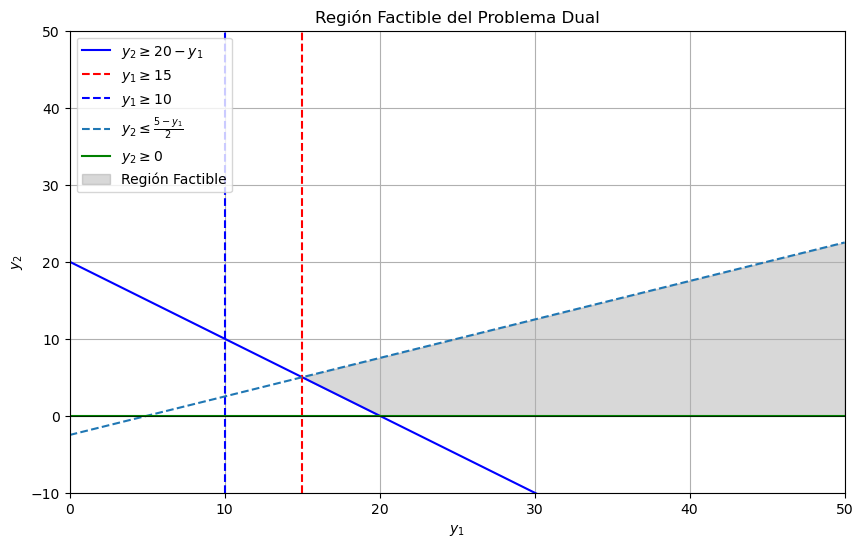

In [3]:
y1 = np.linspace(0, 50, 500)

# Restricciones
y2_1 = 20 - y1
y2_4 = (y1 - 5) / 2
y2_5 = np.zeros_like(y1)

# Graficamos las restricciones
plt.figure(figsize=(10, 6))

plt.plot(y1, y2_1, label=r'$y_2 \geq 20 - y_1$', color='blue')
plt.axvline(15, color='red', linestyle='--', label=r'$y_1 \geq 15$')
plt.axvline(10, color='blue', linestyle='--', label=r'$y_1 \geq 10$')
plt.plot(y1, y2_4, label=r'$y_2 \leq \frac{5 - y_1}{2}$', linestyle='--')
plt.plot(y1, y2_5, label=r'$y_2 \geq 0$', color='green')

# Limitar las áreas factibles
plt.fill_between(
    y1, 
    np.maximum(y2_1, y2_5),  # Tomar el máximo entre las restricciones inferiores (y_2_1 y y_2 >= 0)
    y2_4,  # Restricción superior
    where=(y1 >= 15) & (np.maximum(y2_1, y2_5) <= y2_4), 
    color='gray', 
    alpha=0.3, 
    label="Región Factible"
)

# Ajustes de la gráfica
plt.title('Región Factible del Problema Dual')
plt.xlabel('$y_1$')
plt.ylabel('$y_2$')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.xlim(0, 50)
plt.ylim(-10, 50)
plt.legend(loc='upper left')
plt.grid()
plt.show()


#### Función Objetivo optimizada (Dual):
$$
W^{*} = 1550
$$

#### Solución Óptima:
$$
y_1^{*} = 15, \quad y_2^{*} = 5
$$

#### Aplicamos el Teorema de Holgura Complementaria:
$$
y_1^{*} + y_2^{*} \geq 20 \quad \to \quad 20 = 20 \quad \text{Activa}
$$

$$
y_1^{*} \geq 15 \quad \to \quad 15 = 15 \quad \text{Activa}
$$

$$
y_1^{*} \geq 10 \quad \to \quad 15 > 10 \quad \text{No activa}
$$

$$
y_1^{*} - 2y_2^{*} \geq 5 \quad \to \quad 5 = 5 \quad \text{Activa}
$$

En todas las que son activas, se cumple que $x_i > 0$. Mientras que en las que no están activas, se cumple que $x_i = 0$. Por tanto, $x_1$, $x_2$, y $x_4$ son mayores a 0, mientras que $x_3 = 0$.

#### Nueva Función Objetivo optimizada (Primal):
$$
Z^{*} = 20x_1 + 15x_2 + 5x_4
$$

#### Nuevas restricciones
1. Restricción del número total de entradas:
$$
x_1 + x_2 + x_4 \leq 100
$$

2. Restricción de las entradas de Maratón:
$$
x_1 - 2x_4 \leq 10
$$

3. Restricción de no negatividad:
$$
x_1, \, x_2, \, x_4 \geq 0
$$


In [4]:
# Crear el modelo
model = ConcreteModel()

# Definir las variables
model.x1 = Var(domain=NonNegativeReals)
model.x2 = Var(domain=NonNegativeReals)
model.x3 = Var(domain=NonNegativeReals)

# Definir la función objetivo
model.obj = Objective(expr=20*model.x1 + 15*model.x2 + 5*model.x3, sense=maximize)

# Definir las restricciones
model.constraint1 = Constraint(expr=model.x1 + model.x2 + model.x3 <= 100)
model.constraint2 = Constraint(expr=model.x1 - 2*model.x3 <= 10)

# Resolver el problema
solver = SolverFactory('glpk')
solver.solve(model)

# Mostrar los resultados
model.x1.display()
model.x2.display()
model.x3.display()
model.obj.display()

x1 : Size=1, Index=None
    Key  : Lower : Value : Upper : Fixed : Stale : Domain
    None :     0 :  70.0 :  None : False : False : NonNegativeReals
x2 : Size=1, Index=None
    Key  : Lower : Value : Upper : Fixed : Stale : Domain
    None :     0 :   0.0 :  None : False : False : NonNegativeReals
x3 : Size=1, Index=None
    Key  : Lower : Value : Upper : Fixed : Stale : Domain
    None :     0 :  30.0 :  None : False : False : NonNegativeReals
obj : Size=1, Index=None, Active=True
    Key  : Active : Value
    None :   True : 1550.0


#### Función Objetivo optimizada (Primal):
$$
Z^{*} = 1550
$$

#### Solución Óptima:
$$
x_1^{*} = 70, \quad x_3^{*} = 0, \quad x_4^{*} = 30
$$

### Conclusión
La solución óptima es vender 70 entradas de Tribuna, 0 de Preferencia, 0 de Pabellón, y 30 de Maratón. Obteniendo un beneficio total de 1550 euros.

## Planteamiento del problema primal grande:


Tenemos un estadio de fútbol y queremos ubicar los asientos conforme obtengamos la mayor cantidad de beneficio posible. Los precios de las entradas van acorde a como de bien se ve desde cada asiento. Por tanto, las de tribuna y preferencia son las más caras, valiendo tribuna 20 euros, y preferencia 15. Mientras que las de pabellón y y maratón son de 10 y 5 eureos respectivamente. También hay que tener en cuenta los abonos por grada, siendo en tribuna el precio de 340 euros, en preferencia 235, en pabellón 150, y en maratón 80. Hay un total de 19 jonadas en la liga, así que se pueden vender 19 entradas por cada abono como máximo.

El número de entradas de las que disponemos son 12000 para todo el estadio. También hay que tener en cuenta que nos obliga la competición a que como máximo podemos tener el 90% del estadio abonado, obligando a que esta cantidad no se exceda en ninguna parte del estadio. Y los aficionados nos exigen que como mínimo quieren el 70% de asientos para abonados.

#### Variables de Decisión
    $x_1$: Número de entradas vendidas de Tribuna.
    $x_2$: Número de entradas vendidas de Preferencia.
    $x_3$: Número de entradas vendidas de Pabellón.
    $x_4$: Número de entradas vendidas de Maratón.
    $x_5$: Número de abonos de Tribuna.
    $x_6$: Número de abonos de Preferencia.
    $x_7$: Número de abonos de Pabellón.
    $x_8$: Número de abonos de Maratón.

#### Función Objetivo
Maximizar el beneficio total:
$$
Z = c * (20x_1 + 15x_2 + 10x_3 + 5x_4) + 340x_5 + 235x_6 + 150x_7 + 80x_8
$$

Donde $c$ representa el número de jornadas en las que se venden todas las entradas.

#### Restricciones
Restricciones por zonas:
$$
x_1 + x_5 \leq 4000
$$
$$
x_2 + x_6 \leq 4000
$$
$$
x_3 + x_7 \leq 2000
$$
$$
x_4 + x_8 \leq 2000
$$

Restricciones por número total de maximo y mínimo de entradas para abonados:
$$
x_1 \leq 1600
$$
$$
x_2 \leq 1600
$$
$$
x_3 \leq 800
$$
$$
x_4 \leq 800
$$
$$
x_5 \leq 3600
$$
$$
x_6 \leq 3600
$$
$$
x_7 \leq 1800
$$
$$
x_8 \leq 1800
$$

Restricciones de no negatividad:
$$
x_1, x_2, x_3, x_4, x_5, x_6, x_7, x_8 \geq 0
$$

In [7]:
# Crear el modelo
model = ConcreteModel()

# Definir variables de decisión
model.x1 = Var(within=NonNegativeReals)
model.x2 = Var(within=NonNegativeReals)
model.x3 = Var(within=NonNegativeReals)
model.x4 = Var(within=NonNegativeReals)
model.x5 = Var(within=NonNegativeReals)
model.x6 = Var(within=NonNegativeReals)
model.x7 = Var(within=NonNegativeReals)
model.x8 = Var(within=NonNegativeReals)

# Función objetivo inicial
model.obj = Objective(expr=19 * (20 * model.x1 + 15 * model.x2 + 10 * model.x3 + 5 * model.x4) + 340 * model.x5 + 235 * model.x6 + 150 * model.x7 +80 * model.x8, sense=maximize)

# Definir restricciones
model.constraint1 = Constraint(expr=model.x1 + model.x5 <= 4000)
model.constraint2 = Constraint(expr=model.x2 + model.x6 <= 4000)
model.constraint3 = Constraint(expr=model.x3 + model.x7 <= 2000)
model.constraint4 = Constraint(expr=model.x4 + model.x8 <= 2000)
model.constraint5 = Constraint(expr=model.x1 <= 1600)
model.constraint6 = Constraint(expr=model.x2 <= 1600)
model.constraint7 = Constraint(expr=model.x3 <= 800)
model.constraint8 = Constraint(expr=model.x4 <= 800)
model.constraint9 = Constraint(expr=model.x5 <= 3600)
model.constraint10 = Constraint(expr=model.x6 <= 3600)
model.constraint11 = Constraint(expr=model.x7 <= 1800)
model.constraint12 = Constraint(expr=model.x8 <= 1800)

# Resolver el modelo base
solver = SolverFactory('glpk')
solver.solve(model)

# Guardar los valores iniciales
original_obj_value = model.obj()
original_x1 = model.x1()
original_x2 = model.x2()
original_x3 = model.x3()
original_x4 = model.x4()
original_x5 = model.x5()
original_x6 = model.x6()
original_x7 = model.x7()
original_x8 = model.x8()

print("Solución base:")
print("Valor objetivo:", original_obj_value)
print("x1:", original_x1)
print("x2:", original_x2)
print("x3:", original_x3)
print("x4:", original_x4)
print("x5:", original_x5)
print("x6:", original_x6)
print("x7:", original_x7)
print("x8:", original_x8)

# Análisis de sensibilidad sobre el coeficiente de x en la función objetivo
coef_range = range(14, 20, 1)  # Cambiar el coeficiente de 14 a 19 en pasos de 4
sens_results = []

for coef_c in coef_range:
    # Actualizar el coeficiente de x en la función objetivo
    model.obj.set_value(coef_c *  (20 * model.x1 + 15 * model.x2 + 10 * model.x3 + 5 * model.x4) + 340 * model.x5 + 235 * model.x6 + 150 * model.x7 +80 * model.x8)
    
    # Resolver el modelo modificado
    solver.solve(model)
    
    # Guardar los resultados
    sens_results.append({
        'coef_c': coef_c,
        'obj_value': model.obj(),
        'x1': model.x1(),
        'x2': model.x2(),
        'x3': model.x3(),
        'x4': model.x4(),
        'x5': model.x5(),
        'x6': model.x6(),
        'x7': model.x7(),
        'x8': model.x8()
    })

# Mostrar resultados de sensibilidad
print("\nAnálisis de sensibilidad en el número de jornadas en la función objetivo:")
for result in sens_results:
    print("\nCoeficiente de c:", result['coef_c'])
    print("Valor objetivo:", result['obj_value'])
    print("x1:", result['x1'])
    print("x2:", result['x2'])
    print("x3:", result['x3'])
    print("x4:", result['x4'])
    print("x5:", result['x5'])
    print("x6:", result['x6'])
    print("x7:", result['x7'])
    print("x8:", result['x8'])

Solución base:
Valor objetivo: 2948000.0
x1: 1600.0
x2: 1600.0
x3: 800.0
x4: 800.0
x5: 2400.0
x6: 2400.0
x7: 1200.0
x8: 1200.0

Análisis de sensibilidad en el número de jornadas en la función objetivo:

Coeficiente de c: 14
Valor objetivo: 2722000.0
x1: 400.0
x2: 400.0
x3: 200.0
x4: 200.0
x5: 3600.0
x6: 3600.0
x7: 1800.0
x8: 1800.0

Coeficiente de c: 15
Valor objetivo: 2739000.0
x1: 400.0
x2: 400.0
x3: 800.0
x4: 200.0
x5: 3600.0
x6: 3600.0
x7: 1200.0
x8: 1800.0

Coeficiente de c: 16
Valor objetivo: 2768000.0
x1: 400.0
x2: 1600.0
x3: 800.0
x4: 800.0
x5: 3600.0
x6: 2400.0
x7: 1200.0
x8: 1200.0

Coeficiente de c: 17
Valor objetivo: 2812000.0
x1: 1600.0
x2: 1600.0
x3: 800.0
x4: 800.0
x5: 2400.0
x6: 2400.0
x7: 1200.0
x8: 1200.0

Coeficiente de c: 18
Valor objetivo: 2880000.0
x1: 1600.0
x2: 1600.0
x3: 800.0
x4: 800.0
x5: 2400.0
x6: 2400.0
x7: 1200.0
x8: 1200.0

Coeficiente de c: 19
Valor objetivo: 2948000.0
x1: 1600.0
x2: 1600.0
x3: 800.0
x4: 800.0
x5: 2400.0
x6: 2400.0
x7: 1200.0
x8: 1200.0

#### Solución (Primal):
Podemos ver que la solución óptima es vender 1600 entradas de Tribuna, 1600 de Preferencia, 800 de Pabellón, 800 de Maratón, 3600 abonos de Tribuna, 3600 de Preferencia, 1800 de Pabellón, y 1800 de Maratón. Obteniendo un beneficio total de 2.948.000 euros. Esto teniendo en cuenta una asistencia perfecta en todas las jornadas. Pero siendo realistas esto es imposible, por lo tanto hemos calculado la cantidad de entradas que se podrían llegar a vender. Esto lo hemos calculado sumando el número total de entradas que creemos que se venderán en toda la temporada, y represéntándolo como las veces que se llena el estadio.
Lo que nos ha llevado a la conclusión de que a partir de lo que hemos llamado 17 llenos, nos compensa más vender el mayor número de entradas posibles. En cambio, por debajo de eso va variando hasta llegar a los 14 llenos, donde nos compensa vender el mayor número de abonos posibles. Esto lo hemos podido hacer gracias a que sabemos que nuestras campañas de abonados son siempre un éxito, y que se van a vender todos los abonos que se pongan a la venta.

## Problema dual grande:

#### Variables del Dual
    Sean $y_1, y_2, y_3, y_4$ las variables asociadas a las restricciones de las zonas.
    Sean $y_5, y_6, y_7, y_8$ las variables asociadas a las restricciones de las entradas vendidas (máximos).
    Sean $y_9, y_{10}, y_{11}, y_{12}$ las variables asociadas a las restricciones de los abonos (máximos).

#### Función Objetivo del Dual

El problema primal busca maximizar. Por lo tanto, el dual será un problema de minimización. La función objetivo del dual será:

$$
W = 4000\,y_1 + 4000\,y_2 + 2000\,y_3 + 2000\,y_4
  + 1600\,y_5 + 1600\,y_6 + 800\,y_7 + 800\,y_8
  + 3600\,y_9 + 3600\,y_{10} + 1800\,y_{11} + 1800\,y_{12}.
$$

#### Restricciones del Dual

Las restricciones del dual se derivan de los coeficientes de las variables en la función objetivo del problema primal. Para cada variable del primal 
$$
x_1, x_2, x_3, x_4, x_5, x_6, x_7, x_8
$$
habrá una restricción en el dual. Estas restricciones son:

\begin{align*}
\text{Para } x_1: \quad & 20 \cdot 19 \;\;\le\; y_1 + y_5, \\
\text{Para } x_2: \quad & 15 \cdot 19 \;\;\le\; y_2 + y_6, \\
\text{Para } x_3: \quad & 10 \cdot 19 \;\;\le\; y_3 + y_7, \\
\text{Para } x_4: \quad & 5  \cdot 19 \;\;\le\; y_4 + y_8, \\
\text{Para } x_5: \quad & 340 \;\;\le\; y_1 + y_9, \\
\text{Para } x_6: \quad & 235 \;\;\le\; y_2 + y_{10}, \\
\text{Para } x_7: \quad & 150 \;\;\le\; y_3 + y_{11}, \\
\text{Para } x_8: \quad & 80  \;\;\le\; y_4 + y_{12}.
\end{align*}

#### Restricciones de no negatividad

$$
y_1, \; y_2, \; y_3, \; y_4, \;
y_5, \; y_6, \; y_7, \; y_8, \;
y_9, \; y_{10}, \; y_{11}, \; y_{12} \;\;\ge\; 0.
$$





In [ ]:
# Crear el modelo dual
model_dual = ConcreteModel()

# Definir variables del dual
y_vars = range(1, 13)  # y1, y2, ..., y12
model_dual.y = Var(y_vars, within=NonNegativeReals)

# Función objetivo (minimización en el dual)
model_dual.obj = Objective(expr=4000 * model_dual.y[1] + 4000 * model_dual.y[2] + 2000 * model_dual.y[3] + 2000 * model_dual.y[4] + 1600 * model_dual.y[5] + 1600 * model_dual.y[6] + 800 * model_dual.y[7] + 800 * model_dual.y[8] + 3600 * model_dual.y[9] + 3600 * model_dual.y[10] + 1800 * model_dual.y[11] + 1800 * model_dual.y[12],sense=minimize
)

# Restricciones del dual
model_dual.constraint1 = Constraint(expr=20 * 19 <= model_dual.y[1] + model_dual.y[5])
model_dual.constraint2 = Constraint(expr=15 * 19 <= model_dual.y[2] + model_dual.y[6])
model_dual.constraint3 = Constraint(expr=10 * 19 <= model_dual.y[3] + model_dual.y[7])
model_dual.constraint4 = Constraint(expr=5 * 19 <= model_dual.y[4] + model_dual.y[8])
model_dual.constraint5 = Constraint(expr=340 <= model_dual.y[1] + model_dual.y[9])
model_dual.constraint6 = Constraint(expr=235 <= model_dual.y[2] + model_dual.y[10])
model_dual.constraint7 = Constraint(expr=150 <= model_dual.y[3] + model_dual.y[11])
model_dual.constraint8 = Constraint(expr=80 <= model_dual.y[4] + model_dual.y[12])

# Resolver el modelo dual
solver = SolverFactory('glpk')
solver.solve(model_dual)

# Guardar y mostrar resultados del dual
dual_obj_value = model_dual.obj()
y_values = {f'y{i}': model_dual.y[i]() for i in y_vars}

# Analizar precios sombra
#shadow_prices = {}
#for i in range(1, 9):
#    shadow_prices[f'constraint{i}'] = model_dual.dual.get(model_dual.component(f'constraint{i}'))

print("Solución del dual:")
print("Valor objetivo (mínimo):", dual_obj_value)
for var, value in y_values.items():
    print(f"{var}: {value}")


Solución del dual:
Valor objetivo (mínimo): 2948000.0
y1: 340.0
y2: 235.0
y3: 150.0
y4: 80.0
y5: 40.0
y6: 50.0
y7: 40.0
y8: 15.0
y9: 0.0
y10: 0.0
y11: 0.0
y12: 0.0


#### Interpretación del problema Dual:
El Dual nos indica que para el lleno en todas las jornadas, entonces da igual el número máximo de abonos que nos permita la liga, a nosotros nos compensa vender el máximo número de entradas posibles. Esto se debe a que los abonos son más baratos que las entradas, y por tanto, si se llena el estadio, nos compensa vender entradas.

## Precios sombra:
En este caso las variables $y_9$, $y_{10}$, $y_{11}$, $y_{12}$ tienen valor de 0. Lo que significa que no añaden un valor adicional al aumentar o disminuir sus valores, por lo tanto no influyen en la solución óptima.